<a href="https://colab.research.google.com/github/AfraNesya/UAS_KRIPTOGRAFI/blob/main/Pengukuran_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

Nilai MSE: 7604.5802875
Nilai PSNR: 9.320051114273237 dB


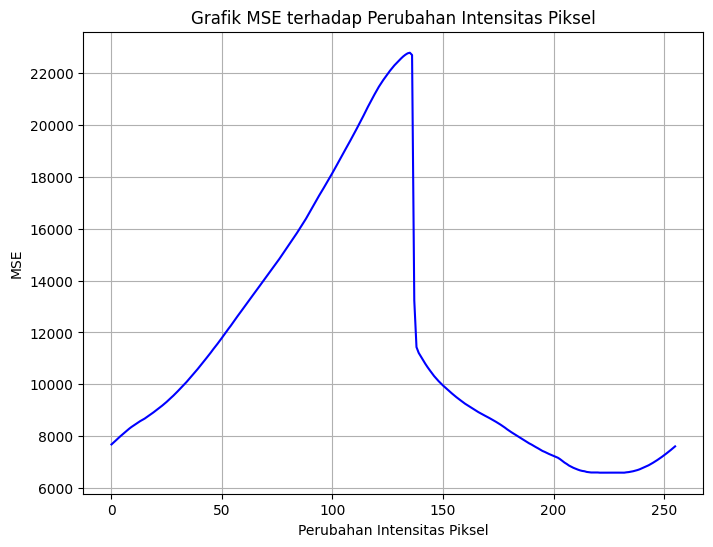

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

def calculate_psnr(mse, max_pixel):
    return 20 * np.log10(max_pixel / np.sqrt(mse))

# Citra pertama dan kedua (pastikan ukurannya sama)
image1 = cv2.imread('jaguar.png')  # Masukkan nama file citra pertama di sini
if image1 is None:
    print("Gagal membaca gambar.")

image2 = cv2.imread('mario.png')  # Masukkan nama file citra kedua di sini
if image2 is None:
    print("Gagal membaca gambar.")


# Konversi citra ke grayscale jika perlu
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Inisialisasi daftar untuk menyimpan nilai MSE dan nilai x (indeks)
mse_values = []
x_values = []

# Iterasi untuk menghasilkan rentang nilai x dari 0 hingga 256
for i in range(256):
    # Hitung nilai MSE untuk setiap x
    mse = calculate_mse(image1_gray.astype(float), (image2_gray.astype(float) + i) % 256)
    mse_values.append(mse)
    x_values.append(i)

# Hitung Peak Signal-to-Noise Ratio (PSNR)
max_pixel = 255.0  # Piksel maksimum untuk citra 8-bit grayscale
psnr = calculate_psnr(mse, max_pixel)

print(f"Nilai MSE: {mse}")
print(f"Nilai PSNR: {psnr} dB")

# Plot grafik garis MSE
plt.figure(figsize=(8, 6))
plt.plot(x_values, mse_values, color='blue')
plt.xlabel('Perubahan Intensitas Piksel')
plt.ylabel('MSE')
plt.title('Grafik MSE terhadap Perubahan Intensitas Piksel')
plt.grid(True)
plt.show()
